In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # for a good visualization of the trees 

In [2]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]


In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [4]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])


array([1, 1, 0])

In [5]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



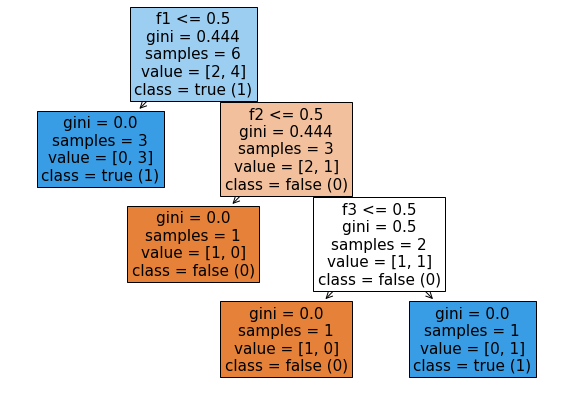

In [6]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


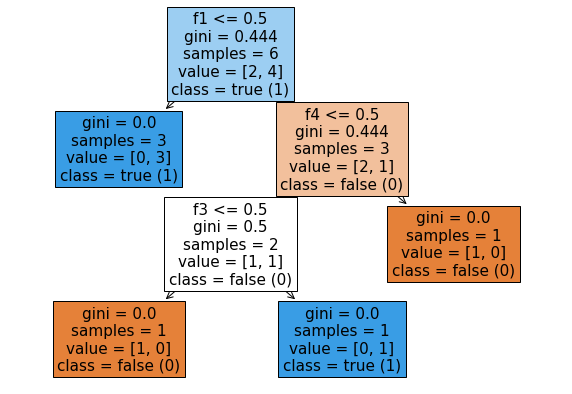

In [7]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1] , [1, 1, 0, 0, 1, 1] , [1, 0, 1, 1, 1, 1] , [0, 0, 0, 1, 1, 1] ,\
     [1, 1, 1, 0, 1, 1]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[1,1,1,1, 1,1] , [0,1,0,0, 1, 1] , [1,1,0,1, 1, 1 ]])
text_representation = tree.export_text(clf)
             
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4", "f5", "f6"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


 On choisit f1 car c'est la feature pour laquelle la fonction gini (fonction d'écart) est la plus élevée
 il y a autant de 0 que de 1, la discrimination est donc plus efficace.
 Samples=6 car on considère les 6 échantillons.
 value=[2,4] car deux échantillons correspondent à la valeur finale 0 et quatre à 1.
 Pour les échantillons où f1=0 (<=0,5), tous ont pour valeur final 1 donc il s'agit d'une feuille et on peut s'arrêter là.
 Pouyr les échantillons f1=1 (>0,5), on remarque que un aura pour valeur 1, et deux auront pour valeur 0. Il faut donc re-discriminer à l'aide de f4 qui a le plus grand gini dans les features restants dans les échantillons restants. 

Les features sont: "Number_of_Priors" (nombre d'antécédents), "score_factor"(...), "Age_Above_FourtyFive"(ben voilà), "Age_Below_TwentyFive"(âge en-dessus de 25), "African_American" (afro-américains), "Asian", "Hispanic", "Native_American" (les amérindiens), "Other" (les Autres), "female" (femme), "misdemeanor" (infraction)
La classe associée au"Two_yr_Recidivism" (personnes qui ont récidivé deux années après leur dernière incarcération), 

Nb d'exemples (additionner 0 et 1): 3363+2809=6172

Le feature Number_of_Priors va avoir un impact fort sur les résultats (si on a de forts antécédents la probabilité qu'on récidive est très forte alors que si on a aucun antécédents elle est plus faible). Après observation, les femmes récidivent peu, on ne peut rien dire de particulier par rapport aux hommes. Les gens en-dessous de 25 ans ont plus de chance de récidiver. Les afro-américains récidivent beaucoup. Les hispaniques récidivent peu. Le score factor a un énoooorme impact.

On peut enlever "age above fourty five", "asian", "native american", "other" et "misdemeanor"

Le nombre d'antécéddents, on peut mettre une valeur seuil (0 par exemple)

In [8]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
print(train_examples) # Training dataset avec des valeurs binaires
print("-----------------")
print(train_labels) # les labels donc les résultats attendus
print("-----------------")
#print(features) # les noms des features
print("-----------------")
print(prediction) # ce qui doit être prédit

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
-----------------
[1 0 0 ... 1 0 1]
-----------------
-----------------
two_year_recid


splitter peut prendre comme argument "best" ou "random" pour que la décision de répartition pour chaque node soit aléatoire ou déterministe (avec une méthode qui détermine la meilleure répartition)

max_depth : la profondeur maximale de l'arbre

min_samples_leaf : le nombre minimum d'échantillons nécessaires pour considérer une feuille



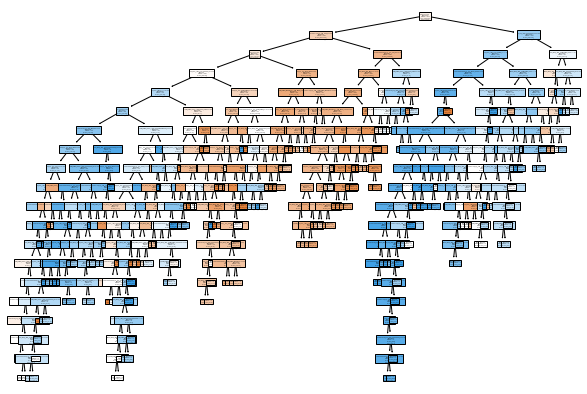

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

text_representation = tree.export_text(clf)
             
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= (features),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

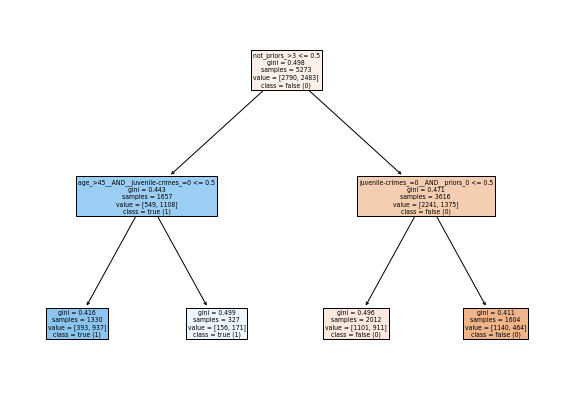

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_examples, train_labels)

text_representation = tree.export_text(clf)
             
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= (features),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

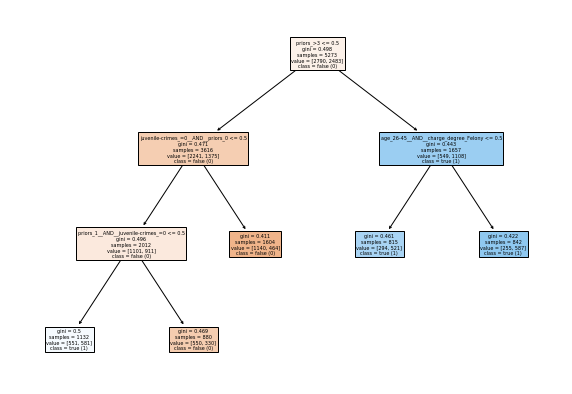

In [11]:
clf = tree.DecisionTreeClassifier(max_depth=5, splitter="best", min_samples_leaf=800)
clf = clf.fit(train_examples, train_labels)

text_representation = tree.export_text(clf)
             
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= (features),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

max_depth automatique donne un graphe illisible sans restriction des feuilles.

max_depth=2 est lisible mais peu utile car on affiche des feuilles ayant un nombre d'échantillon faible autant que des feuilles ayant un nombre d'échantillons très conséquent.

si on restreint les feuilles à celles ayant un nombre d'échantillons de 800 on a un bon compromis entre la précision et la lisibilité.



0.6530805687203791
0.64739336492891
0.6540284360189573
0.6426540284360189
0.671090047393365
0.6777251184834123
0.6701421800947868
0.6691943127962086
0.6701421800947868
0.656872037914692


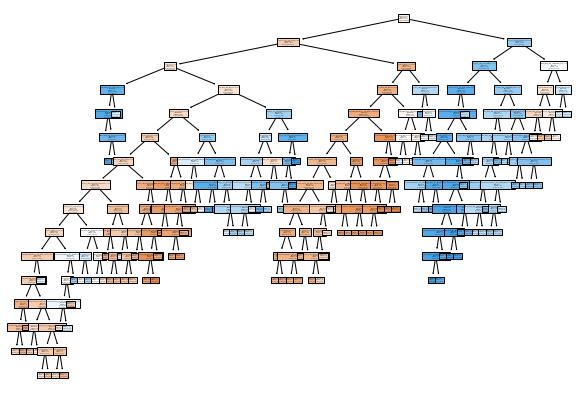

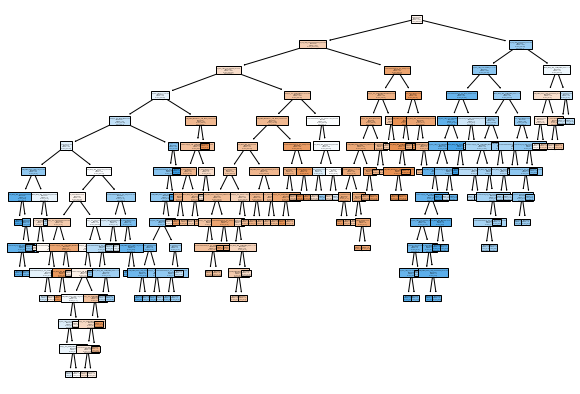

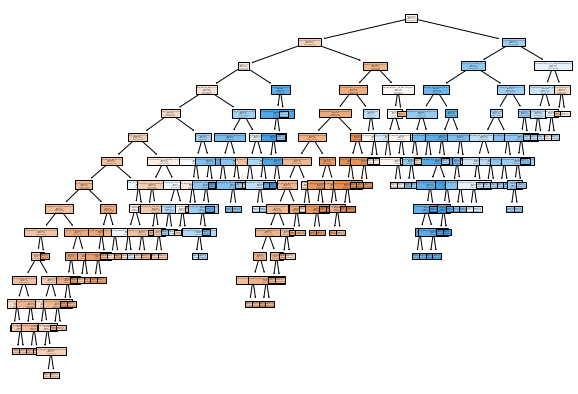

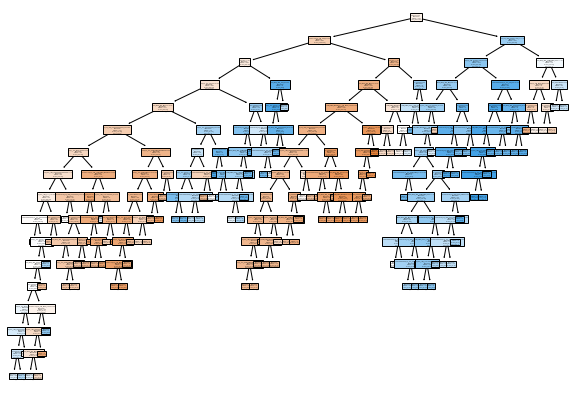

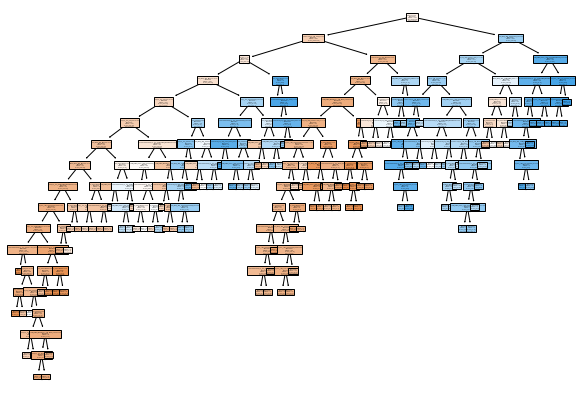

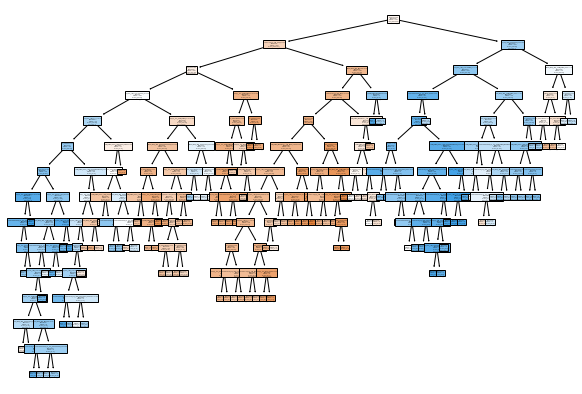

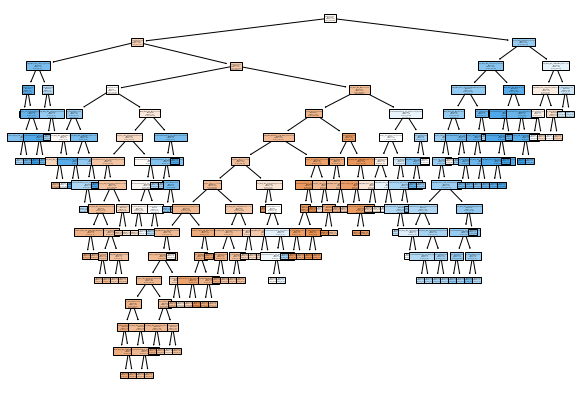

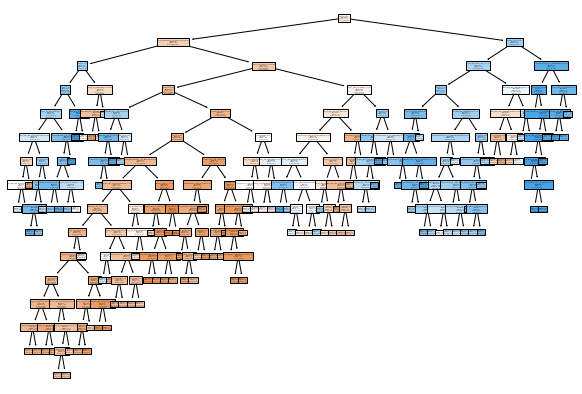

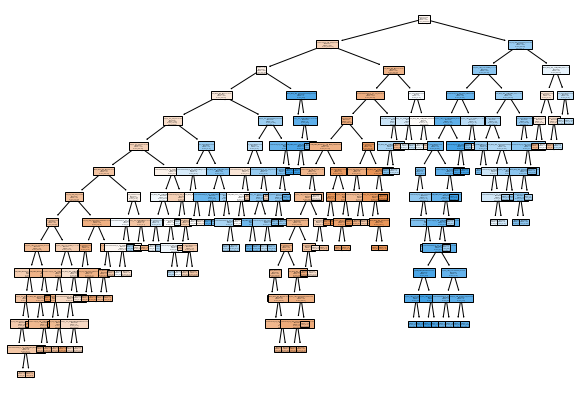

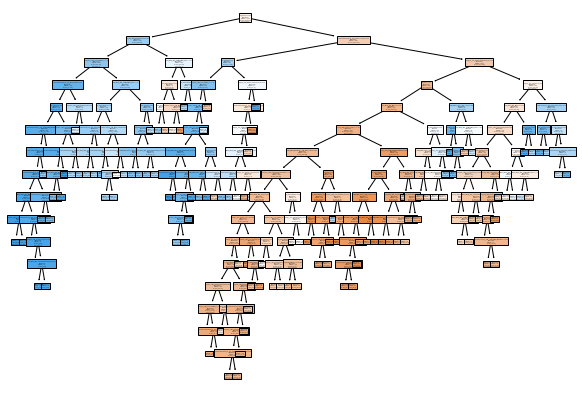

In [12]:
NB_TESTS = 10
for i in range(NB_TESTS):
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, train_size=0.8)
    clf = tree.DecisionTreeClassifier(max_depth=1000, splitter="best", min_samples_leaf=10)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)
    text_representation = tree.export_text(clf)             
    fig = plt.figure(figsize=(10,7))
    _ = tree.plot_tree(clf, 
                   feature_names= (features),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


In [13]:
NB_TESTS = 5
from sklearn.model_selection import KFold
for i in range(NB_TESTS):
    kf = KFold()
    clf = tree.DecisionTreeClassifier(max_depth=10, splitter="best", min_samples_leaf=100)
    
    for train_index, test_index in kf.split(train_examples):
        X_train_k, X_test_k = train_examples[train_index], train_examples[test_index]
        y_train_k, y_test_k = train_labels[train_index], train_labels[test_index]
        clf = clf.fit(X_train_k, y_train_k)
        print(clf.score(X_test_k, y_test_k))
        print(clf.score(X_train_k, y_train_k))
        print("-------------------------")


C:\Users\punis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\punis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\punis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\punis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  w

0.6598407281001137
0.6739687055476529
-------------------------
0.6564277588168373
0.6711237553342817
-------------------------
0.6545247581104154
0.6680887372013652
-------------------------
0.6604095563139932
0.6739687055476529
-------------------------
0.6564277588168373
0.6711237553342817
-------------------------
0.6545247581104154
0.6680887372013652
-------------------------
0.6604095563139932
0.6739687055476529
-------------------------
0.6564277588168373
0.6711237553342817
-------------------------
0.6545247581104154
0.6680887372013652
-------------------------
0.6604095563139932
0.6739687055476529
-------------------------
0.6564277588168373
0.6711237553342817
-------------------------
0.6545247581104154
0.6680887372013652
-------------------------
0.6598407281001137
0.6739687055476529
-------------------------
0.6564277588168373
0.6711237553342817
-------------------------
0.6545247581104154
0.6680887372013652
-------------------------


C:\Users\punis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
